<a href="https://colab.research.google.com/github/TalCordova/Zefr_TC/blob/main/Zefr_DS_Tal_Cordova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zefr DS Home Assignment

Tal Cordova

talcordova56@gmail.com

0504971013

## Question 1 - Logo Detection Model

### import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/Zefr/logo-dataset.v9-raw_images.yolov7pytorch.zip" -d "/content/dataset"

Streaming output truncated to the last 5000 lines.
 extracting: /content/dataset/valid/labels/colgateimg000112_jpg.rf.b7d2a13bc21e812e7085baa713a5ab5e.txt  
 extracting: /content/dataset/valid/labels/colgateimg000114_jpg.rf.97bf6cbb20789446d62098feb747f9bb.txt  
 extracting: /content/dataset/valid/labels/colgateimg000115_jpg.rf.5be7c287841d37095d35bb634f39ced4.txt  
 extracting: /content/dataset/valid/labels/colgateimg000116_jpg.rf.73cc96b1d001c49f6373d347004b6cbb.txt  
 extracting: /content/dataset/valid/labels/colgateimg000118_jpg.rf.72b2b5f630f68831ebefde328928d0e7.txt  
 extracting: /content/dataset/valid/labels/colgateimg000120_jpg.rf.26f5edd4c833fb4d1357f8b4309ac96b.txt  
 extracting: /content/dataset/valid/labels/colgateimg000121_jpg.rf.5bdb8d2b5a8bf2c78d03321c6cea14a1.txt  
 extracting: /content/dataset/valid/labels/colgateimg000123_jpg.rf.78a199a496d22bec912a1a02cae19422.txt  
 extracting: /content/dataset/valid/labels/colgateimg000124_jpg.rf.639af64949f86639bab72263fb96cff7.t

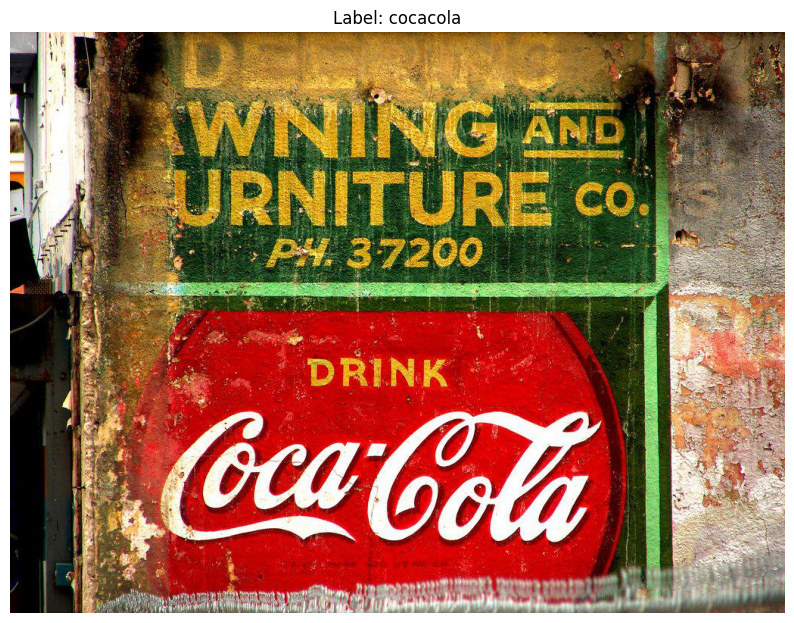

In [ ]:
# View random image
import random
import os
import cv2
import matplotlib.pyplot as plt
import yaml

def show_random_image():
    # Read data.yaml to get class names
    with open('/content/dataset/data.yaml', 'r') as f:
        data = yaml.safe_load(f)
        class_names = data['names']

    image_dir = '/content/dataset/train/images'
    random_image = random.choice(os.listdir(image_dir))
    image_path = os.path.join(image_dir, random_image)
    label_path = image_path.replace('images', 'labels').replace('.jpg', '.txt')

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    with open(label_path, 'r') as f:
        label = f.read().strip().split()
        class_id = int(label[0])
        class_name = class_names[class_id]

    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.title(f"Label: {class_name}")
    plt.axis('off')
    plt.show()

show_random_image()

### Convert Labels

In [ ]:
import os
import yaml
import shutil

# Paths
base_dir = "/content/dataset"  # Path to the original dataset directory
yaml_file = os.path.join(base_dir, "data.yaml")  # Path to the data.yaml file
output_base_dir = "/content/dataset_binary"  # Path to save binary labels and images

# Ensure output directories exist for train and valid
os.makedirs(os.path.join(output_base_dir, "train/images"), exist_ok=True)
os.makedirs(os.path.join(output_base_dir, "train/labels"), exist_ok=True)
os.makedirs(os.path.join(output_base_dir, "valid/images"), exist_ok=True)
os.makedirs(os.path.join(output_base_dir, "valid/labels"), exist_ok=True)

# Load the YAML file to map class IDs to brand names
with open(yaml_file, "r") as file:
    data = yaml.safe_load(file)
class_names = data["names"]  # List of class names
target_brands = {'cocacola', 'coke', 'disney', 'starbucks', 'mcdonalds', 'mcdonalds_text'}

# Find class IDs corresponding to the target brands
target_class_ids = {i for i, name in enumerate(class_names) if name in target_brands}

# Function to process labels and copy images
def process_labels_and_images(input_image_dir, input_label_dir, output_image_dir, output_label_dir):
    for label_file in os.listdir(input_label_dir):
        input_label_path = os.path.join(input_label_dir, label_file)
        output_label_path = os.path.join(output_label_dir, label_file)

        with open(input_label_path, "r") as file:
            lines = file.readlines()

        # Convert class IDs to binary labels
        new_lines = []
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])  # Get the class ID

            # Convert to binary label
            binary_label = 1 if class_id in target_class_ids else 0

            # Replace class_id with binary_label, keeping bbox info
            new_line = f"{binary_label} " + " ".join(parts[1:])
            new_lines.append(new_line)

        # Save the modified labels
        with open(output_label_path, "w") as file:
            file.write("\n".join(new_lines))

        # Copy the corresponding image
        image_file = label_file.replace(".txt", ".jpg")
        input_image_path = os.path.join(input_image_dir, image_file)
        output_image_path = os.path.join(output_image_dir, image_file)

        if os.path.exists(input_image_path):
            shutil.copy(input_image_path, output_image_path)

# Process train and valid datasets
process_labels_and_images(
    os.path.join(base_dir, "train/images"),
    os.path.join(base_dir, "train/labels"),
    os.path.join(output_base_dir, "train/images"),
    os.path.join(output_base_dir, "train/labels")
)

process_labels_and_images(
    os.path.join(base_dir, "valid/images"),
    os.path.join(base_dir, "valid/labels"),
    os.path.join(output_base_dir, "valid/images"),
    os.path.join(output_base_dir, "valid/labels")
)

print("Labels and images successfully processed for both train and valid!")

Labels and images successfully processed for both train and valid!


In [ ]:
## Check image size
import os
from PIL import Image

# Paths
image_dir = '/content/dataset_binary/train/images'  # Change to valid/images if needed

# Check image sizes
image_sizes = []
for img_file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_file)
    with Image.open(img_path) as img:
        image_sizes.append(img.size)  # (width, height)

# Print some examples
print(f"Total images: {len(image_sizes)}")
print("Sample image sizes:", image_sizes[:10])

# Optional: Find the most common image size
from collections import Counter
size_counts = Counter(image_sizes)
print("Most common image sizes:")
for size, count in size_counts.most_common(5):
    print(f"{size}: {count} images")

Total images: 16731
Sample image sizes: [(4608, 3072), (1200, 753), (800, 1281), (354, 200), (1024, 685), (640, 475), (800, 766), (1463, 1463), (1473, 1475), (800, 533)]
Most common image sizes:
(1024, 768): 1543 images
(1024, 683): 554 images
(768, 1024): 511 images
(800, 533): 242 images
(1024, 576): 218 images


#### Show Random Images

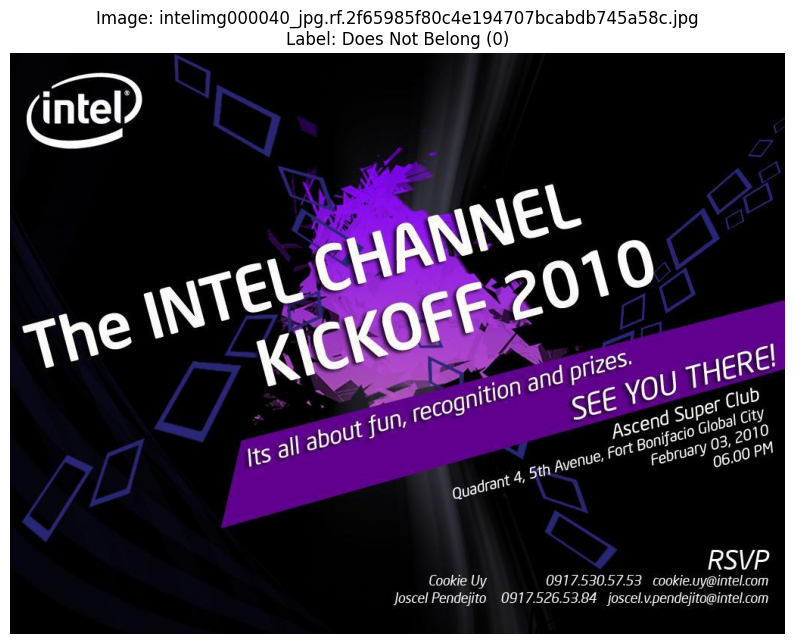

In [ ]:
def show_random_image_with_simple_label(set_type='train'):
    # Paths
    image_dir = f'/content/dataset_binary/{set_type}/images'
    label_dir = f'/content/dataset_binary/{set_type}/labels'

    # Select a random image
    random_image = random.choice(os.listdir(image_dir))
    image_path = os.path.join(image_dir, random_image)
    label_path = os.path.join(label_dir, random_image.replace('.jpg', '.txt'))

    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Default label
    label = "Unknown"

    # Check the label file
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            labels = f.readlines()
        # Check if any label is 1
        label = "Belongs (1)" if any(int(line.split()[0]) == 1 for line in labels) else "Does Not Belong (0)"

    # Show the image with the label at the top
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(f"Image: {random_image}\nLabel: {label}")
    plt.axis('off')
    plt.show()

# Call the function for train set
show_random_image_with_simple_label(set_type='train')


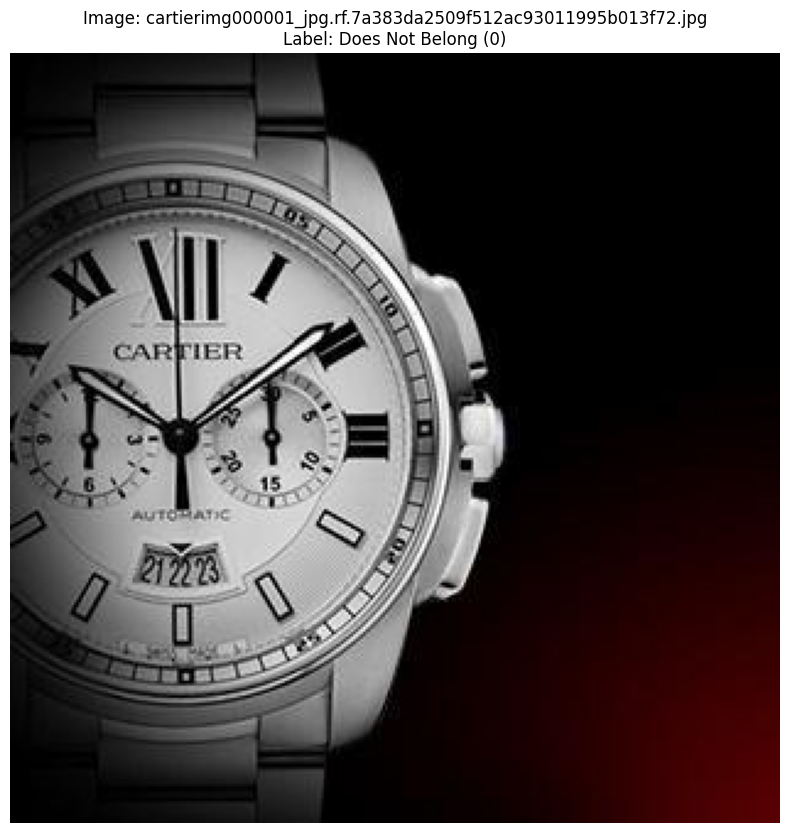

In [ ]:
show_random_image_with_simple_label(set_type='valid')

In [ ]:
## Check class counts

from collections import Counter
import os

def count_labels(label_dir):
    counts = Counter()
    for label_file in os.listdir(label_dir):
        with open(os.path.join(label_dir, label_file), "r") as f:
            for line in f:
                class_id = int(line.strip().split()[0])  # Extract the binary class label
                counts[class_id] += 1
    return counts

# Count labels in train and valid datasets
train_counts = count_labels("/content/dataset_binary/train/labels")
valid_counts = count_labels("/content/dataset_binary/valid/labels")

print(f"Train Label Counts: {train_counts}")
print(f"Valid Label Counts: {valid_counts}")

Train Label Counts: Counter({0: 29860, 1: 1567})
Valid Label Counts: Counter({0: 18206, 1: 1517})


> **Note**: We can see that the classes are imbalanced, and therefore, will need to consider it while training and evaluating the model

### Build the Model

I decided to use TinyVGG architecture for classification because:

1. Lightweight Architecture: TinyVGG uses fewer parameters, making it faster to train and deploy.
2. Image Classification Focus: Works well for binary classification when combined with a final sigmoid activation.
3. Simple Training: Easy to implement and fine-tune for small datasets.

I used several augmentations to increase generalization and strenghtehn the model:

1. Horizontal flip - Many logos can appear flipped (mirrored views on products, ads, or websites).
2. Random Rotation - Logos in real-world scenarios may not always be perfectly aligned (tilted logos on billboards, products, or packaging).
3. Resize - We have different image sizes, and since I am using TinyVGG, I will convert all of them to `224x224` image sizes and augment the train set.

In [ ]:
# Data Augmentation and resize
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),           # Resize all images to 224x224
    transforms.RandomHorizontalFlip(),       # Randomly flip images horizontally
    transforms.RandomRotation(10),          # Random rotation within ±10 degrees
    transforms.ToTensor(),                  # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

valid_transforms = transforms.Compose([
    transforms.Resize((224, 224)),          # Resize all images to 224x224
    transforms.ToTensor(),                  # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
# Create custom Dataset
from torch.utils.data import DataLoader, Dataset
from torchvision.io import read_image
import os
import torch

class LogoDataset(torch.utils.data.Dataset):
    def __init__(self, image_dir, label_dir, transform=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.transform = transform
        self.images = os.listdir(image_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.images[idx])
        label_path = os.path.join(self.label_dir, self.images[idx].replace('.jpg', '.txt'))

        # Load the image
        image = Image.open(image_path).convert("RGB")  # Ensure image is RGB

        # Apply the transform
        if self.transform:
            image = self.transform(image)

        # Load the label
        with open(label_path, 'r') as f:
            labels = f.readlines()
        label = 1 if any(int(line.split()[0]) == 1 for line in labels) else 0

        return image, label

In [ ]:
# Paths
train_image_dir = '/content/dataset_binary/train/images'
train_label_dir = '/content/dataset_binary/train/labels'
valid_image_dir = '/content/dataset_binary/valid/images'
valid_label_dir = '/content/dataset_binary/valid/labels'

# Create datasets
train_dataset = LogoDataset(train_image_dir, train_label_dir, transform=train_transforms)
valid_dataset = LogoDataset(valid_image_dir, valid_label_dir, transform=valid_transforms)

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

#### TinyVGG

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
class TinyVGG(nn.Module):
    def __init__(self, input_channels: int, hidden_units: int, output_shape: int = 1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=input_channels,
                               out_channels=hidden_units,
                               kernel_size=3,
                               stride=1,
                               padding=1)  # Keeps input size
        self.pool = nn.MaxPool2d(2)  # Halves input size
        self.conv2 = nn.Conv2d(in_channels=hidden_units,
                               out_channels=hidden_units,
                               kernel_size=3,
                               stride=1,
                               padding=1)

        # Placeholder for dynamically calculated input size
        self.flatten_input_size = None
        self.flatten = nn.Flatten()
        self.linear = None  # Placeholder for the final linear layer

        self.output_shape = output_shape
        self.hidden_units = hidden_units

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # Dynamically initialize the linear layer on the first forward pass
        if self.linear is None:
            self.flatten_input_size = x.shape[1] * x.shape[2] * x.shape[3]
            self.linear = nn.Linear(self.flatten_input_size, self.output_shape).to(x.device)

        x = self.flatten(x)
        x = self.linear(x)  # Output shape: [batch_size, 1]
        return x.squeeze()  # Remove the extra dimension, output shape: [batch_size]

In [ ]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [ ]:
from torch.optim import Adam
from torch.nn import BCEWithLogitsLoss
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    train_loss, train_acc = 0, 0
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device).float()  # Ensure `y` is float for BCEWithLogitsLoss

        # 1. Forward pass
        y_pred = model(X)  # No sigmoid in the model

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Calculate accuracy
        y_pred_label = (torch.sigmoid(y_pred) > 0.5).float()  # Apply sigmoid + threshold
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred_label)

        # 4. Zero gradients
        optimizer.zero_grad()

        # 5. Backward pass
        loss.backward()

        # 6. Optimizer step
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}")

    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    test_loss, test_acc = 0, 0

    # Put model in eval mode
    model.eval()
    # Turn on inference mode
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device).float()  # Ensure y is float

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate the loss
            test_loss += loss_fn(test_pred, y).item()

            # 3. Calculate accuracy
            test_pred_label = (torch.sigmoid(test_pred) > 0.5).float()  # Threshold predictions
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred_label)

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}")
    return test_loss, test_acc

### Train the Model

In [ ]:
# Handle the imbalance by using class weights in loss function
total_train = train_counts[0] + train_counts[1]
class_weights = torch.tensor([
    total_train / (2 * train_counts[0]),  # Weight for class 0
    total_train / (2 * train_counts[1])   # Weight for class 1
], dtype=torch.float32).to(device)

In [ ]:
from tqdm.auto import tqdm
from torch.nn import BCEWithLogitsLoss
from torch.optim import Adam
from timeit import default_timer as timer

model = TinyVGG(input_channels=3, hidden_units=16).to(device)
loss_fn = BCEWithLogitsLoss(pos_weight=class_weights[1])
optimizer = Adam(model.parameters(), lr=0.001)

torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 3

train_time_start_on_gpu = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model = model,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model,
            data_loader = valid_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_on_gpu = timer()
total_time = train_time_end_on_gpu - train_time_start_on_gpu
print(f"\nTrain time on {device}: {total_time:.3f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.97604 | Train acc: 86.03
Test loss: 1.18537 | Test acc: 82.71
Epoch: 1
-------
Train loss: 0.95547 | Train acc: 85.45
Test loss: 1.18696 | Test acc: 80.74
Epoch: 2
-------
Train loss: 0.94837 | Train acc: 84.59
Test loss: 1.14192 | Test acc: 82.31

Train time on cuda: 893.022 seconds


In [ ]:
from tqdm.auto import tqdm
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=torch.device("cpu")):
    """
    Returns a dictionary containing the results of model evaluation on data_loader
    """
    loss, acc = 0, 0
    model.eval()  # Set model to evaluation mode
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make data device agnostic
            X, y = X.to(device), y.to(device).float()  # Ensure labels are float for BCEWithLogitsLoss

            # Make predictions
            y_pred = model(X).squeeze()  # Remove extra dimension if necessary

            # Accumulate loss
            loss += loss_fn(y_pred, y).item()  # Use .item() to avoid accumulating tensors

            # Accumulate accuracy
            y_pred_label = (torch.sigmoid(y_pred) > 0.5).float()  # Apply sigmoid and threshold
            acc += accuracy_fn(y_true=y, y_pred=y_pred_label)

        # Scale loss and accuracy by the number of batches
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,  # Only works when model is a class instance
        "model_loss": loss,
        "model_acc": acc
    }

### Evaluate the Model

In [ ]:
tinyvgg_results = eval_model(
    model = model,
    data_loader = valid_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

tinyvgg_results

  0%|          | 0/341 [00:00<?, ?it/s]

{'model_name': 'TinyVGG',
 'model_loss': 1.1419228530349619,
 'model_acc': 82.31304985337243}

## Save the Model

Sva the model in `.pth` format to use for deployment

In [ ]:
torch.save(model.state_dict(), "model_weights.pth")